# Comprendre Scikit-Learn

## Charger les données 

L'argent rend-il heureux? On télécharge une base de donnée de l'OECD (Organisation for Economic Co-operation and Development) dans laquel on trouve notamment le [Better Life Index](https://stats.oecd.org/index.aspx?DataSetCode=BLI) de  et une base de donnée relative au PIB: [GDP per capita]( http://goo.gl/j1MSKe) de IMF (International Monetary Found).

### Start coding $\hookleftarrow$

In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import warnings


def global_init():
    pd.set_option('display.max_rows', 500)
    pd.set_option('display.max_columns', 500)
    pd.set_option('display.width', 1000)
    np.set_printoptions(linewidth=500)
    # Ignore useless warnings (see SciPy issue #5998)
    warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")


def clear_all():
    """Clears all the variables from the workspace of the spyder application."""
    gl = globals().copy()
    for var in gl:
        if var[0] == '_': continue
        if 'func' in str(globals()[var]): continue
        if 'module' in str(globals()[var]): continue

        del globals()[var]
        
    global_init()


### Les données "Life satisfaction" 

D'après le site de [OCDE](http://www.oecdbetterlifeindex.org/topics/life-satisfaction/): 

<< Life satisfaction measures how people evaluate their life as a whole rather than their current feelings. When asked to rate their general satisfaction with life on a scale from 0 to 10, people on average across the OECD gave it a 6.5. Life satisfaction is not evenly shared across the OECD however. Some countries – Greece, Hungary, Portugal and Turkey – have a relatively low level of overall life satisfaction, with average scores of 5.5 or less. At the other end of the scale, scores reach 7.5 in Denmark, Finland, Iceland, Norway and Switzerland >>


In [2]:
datapath = os.path.join("datasets", "lifesat", "")
"big dataframe"
df0 = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
df0.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


***A vous:*** $(1\heartsuit)$ A quoi sert l'option `thousands=','`?

Pour chaque pays, beaucoup de lignes. 

In [3]:
"for each country many lines"
df0[df0["LOCATION"]=="BEL"].head(10)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
39,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,MN,Men,PC,Percentage,0,units,NaN,NaN,2.0,E,Estimated value
75,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,WMN,Women,PC,Percentage,0,units,NaN,NaN,2.0,E,Estimated value
111,BEL,Belgium,HO_HISH,Housing expenditure,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,21.0,NaN,NaN
148,BEL,Belgium,HO_HISH,Housing expenditure,L,Value,MN,Men,PC,Percentage,0,units,NaN,NaN,21.0,E,Estimated value
184,BEL,Belgium,HO_HISH,Housing expenditure,L,Value,WMN,Women,PC,Percentage,0,units,NaN,NaN,21.0,E,Estimated value
220,BEL,Belgium,HO_NUMR,Rooms per person,L,Value,TOT,Total,RATIO,Ratio,0,units,NaN,NaN,2.2,NaN,NaN
257,BEL,Belgium,HO_NUMR,Rooms per person,L,Value,MN,Men,RATIO,Ratio,0,units,NaN,NaN,2.2,E,Estimated value
293,BEL,Belgium,HO_NUMR,Rooms per person,L,Value,WMN,Women,RATIO,Ratio,0,units,NaN,NaN,2.2,E,Estimated value
329,BEL,Belgium,IW_HADI,Household net adjusted disposable income,L,Value,TOT,Total,USD,US Dollar,0,units,NaN,NaN,28307.0,NaN,NaN


Observons les différents indicateurs disponibles.

***A vous:*** Tous les indicateurs sont-ils disponibles pour tous les pays? Justifiez ($2\heartsuit$).

In [4]:
"let's see the the different 'indicator' "
df0["Indicator"].value_counts()

Personal earnings                            185
Self-reported health                         185
Employment rate                              185
Long-term unemployment rate                  185
Student skills                               185
Voter turnout                                185
Household net adjusted disposable income     183
Life satisfaction                            179
Quality of support network                   167
Water quality                                111
Time devoted to leisure and personal care    111
Educational attainment                       111
Assault rate                                 111
Years in education                           111
Life expectancy                              111
Job security                                 111
Homicide rate                                111
Employees working very long hours            111
Air pollution                                109
Dwellings without basic facilities           109
Consultation on rule

In [5]:
"we keep only some lines "
df1 = df0[df0["INEQUALITY"]=="TOT"]
"and make a pivot table to  indicators and their values by country"
df2 = df1.pivot(index="Country", columns="Indicator", values="Value")
df2.head()

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [6]:
df2["Life satisfaction"].sort_values(ascending=False) #by default inplace=False, so a original df do not change

Country
Switzerland        7.5
Denmark            7.5
Iceland            7.5
Norway             7.4
Finland            7.4
Israel             7.4
Australia          7.3
Canada             7.3
Netherlands        7.3
New Zealand        7.3
United States      7.2
Sweden             7.2
Germany            7.0
Ireland            7.0
Brazil             7.0
Austria            6.9
Luxembourg         6.9
Belgium            6.9
United Kingdom     6.8
Mexico             6.7
Chile              6.7
OECD - Total       6.6
Czech Republic     6.5
France             6.5
Spain              6.5
Slovak Republic    6.1
Russia             6.0
Italy              6.0
Japan              5.9
Poland             5.8
Korea              5.8
Slovenia           5.7
Estonia            5.6
Turkey             5.6
Portugal           5.1
Hungary            4.9
Greece             4.8
Name: Life satisfaction, dtype: float64

### Les données PIB

Citons Wikipedia:

<< Per capita GDP is a measure of the total output of a country that takes the gross domestic product (GDP=produit intérieur brut) and divides it by the number of people in that country. The per capita GDP is especially useful when comparing one country to another, because it shows the relative performance of the countries >>. 

![GDP per capita](img/GDP.png)


In [7]:
df_gdp = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
df_gdp.rename(columns={"2015": "GDP per capita"}, inplace=True)
df_gdp.set_index("Country", inplace=True)
df_gdp.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [8]:
"our final dataframe"
df_full = pd.merge(left=df_gdp[["GDP per capita"]], right=df2, left_index=True, right_index=True)
df_full.sort_values(by="GDP per capita", inplace=True)
df_full.head(10)

,GDP per capita,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,8669.998,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Mexico,9009.280,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,...,0.08,16193.0,77.0,1.0,66.0,417.0,13.89,63.0,67.0,14.4
Russia,9054.914,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,...,1.70,20885.0,90.0,0.9,37.0,481.0,14.97,65.0,56.0,16.0
Turkey,9437.372,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,...,2.37,16919.0,86.0,1.1,68.0,462.0,13.42,88.0,62.0,16.4
Hungary,12239.894,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,...,5.10,20948.0,87.0,1.1,57.0,487.0,15.04,62.0,77.0,17.6
Poland,12495.334,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,...,3.77,22655.0,91.0,1.1,58.0,521.0,14.20,55.0,79.0,18.4
Chile,13340.905,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,...,1.59,22101.0,86.0,1.2,59.0,436.0,14.41,49.0,73.0,16.5
Slovak Republic,15991.736,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,...,9.46,20307.0,90.0,1.1,66.0,472.0,14.99,59.0,81.0,16.3
Czech Republic,17256.918,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,...,3.12,20338.0,85.0,1.4,60.0,500.0,14.98,59.0,85.0,18.1


In [9]:
df_full.tail(10)

,GDP per capita,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
United Kingdom,43770.688,13.0,1.9,11.5,0.2,78.0,12.70,71.0,0.3,27029.0,...,2.77,41192.0,91.0,1.9,74.0,502.0,14.83,66.0,88.0,16.4
Sweden,49866.266,10.0,5.1,10.9,0.0,88.0,1.13,74.0,0.7,29185.0,...,1.37,40818.0,92.0,1.7,81.0,482.0,15.11,86.0,95.0,19.3
Iceland,50854.583,18.0,2.7,5.1,0.4,71.0,12.25,82.0,0.3,23965.0,...,1.18,55716.0,96.0,1.5,77.0,484.0,14.61,81.0,97.0,19.8
Australia,50961.865,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Ireland,51350.744,13.0,2.6,9.0,0.2,75.0,4.20,60.0,0.8,23917.0,...,8.39,49506.0,96.0,2.1,82.0,516.0,15.19,70.0,80.0,17.6
Denmark,52114.165,15.0,3.9,7.0,0.9,78.0,2.03,73.0,0.3,26491.0,...,1.78,48347.0,95.0,1.9,72.0,498.0,16.06,88.0,94.0,19.4
United States,55805.204,18.0,1.5,8.3,0.1,89.0,11.30,67.0,5.2,41355.0,...,1.91,56340.0,90.0,2.4,88.0,492.0,14.27,68.0,85.0,17.2
Norway,74822.106,16.0,3.3,8.1,0.3,82.0,2.82,75.0,0.6,33492.0,...,0.32,50282.0,94.0,2.0,76.0,496.0,15.56,78.0,94.0,17.9
Switzerland,80675.308,20.0,4.2,8.4,0.0,86.0,6.72,80.0,0.5,33491.0,...,1.46,54236.0,96.0,1.8,81.0,518.0,14.98,49.0,96.0,17.3


### Séparation des données

On verra plus tard qu'on sépare souvent les données en `train` et `test`. Mais ici c'est uniquement pour des raisons pédagofiques que l'on met de côté certain pays.

In [10]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
" to substract list, we transform them into set. This an fast technic (avoiding a double loop) "
keep_indices = list(set(range(36)) - set(remove_indices))

df_sample = df_full[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
df_missing = df_full[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

print("missing countries:\n",df_missing.index.values)

missing countries:
 ['Brazil' 'Mexico' 'Chile' 'Czech Republic' 'Norway' 'Switzerland'
 'Luxembourg']


### checkpoint $\checkmark$

On crée une fonction qui reprend toutes les étapes précédentes

In [11]:
def load_all_data():
    datapath = os.path.join("datasets", "lifesat", "")
    "big dataframe"
    df0 = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
    "we keep only some lines "
    df1 = df0[df0["INEQUALITY"]=="TOT"]
    "and make a pivot table to  indicators and their values by country"
    df2 = df1.pivot(index="Country", columns="Indicator", values="Value")
    df_gdp = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                                 encoding='latin1', na_values="n/a")
    df_gdp.rename(columns={"2015": "GDP per capita"}, inplace=True)
    df_gdp.set_index("Country", inplace=True)
    df_full = pd.merge(left=df_gdp[["GDP per capita"]], right=df2, left_index=True, right_index=True)
    df_full.sort_values(by="GDP per capita", inplace=True)

    "we remove some countries"
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    " to substract list, we transform them into set. This an fast technic (avoiding a double loop) "
    keep_indices = list(set(range(36)) - set(remove_indices))
    df_sample = df_full[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
    df_missing = df_full[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]
    
    return df_full,df_sample,df_missing,df_gdp
    

## Création du model $\hookleftarrow$

On repart de zéro. 

In [52]:
clear_all()
df_full,df_sample,df_missing,df_gdp=load_all_data()

"numpy extraction"
x_sample = df_sample["GDP per capita"].values
X_sample_ext= np.stack([np.ones_like(x_sample),x_sample],axis=1) 
y_sample = df_sample["Life satisfaction"].values
print("x_sample.shape:",x_sample.shape)
print("X_sample_ext.shape",X_sample_ext.shape)
print("y_sample.shape",y_sample.shape)

"some very simple test data: points regularly spaced on a given interval"
xlim=60000
x_test=np.linspace(0, xlim, 1000)



x_sample.shape: (29,)
X_sample_ext.shape (29, 2)
y_sample.shape (29,)


In [62]:
"we save some data"
df_sample.to_csv('img/df_sample.csv')
df_missing.to_csv('img/df_missing.csv')
df_full.to_csv('img/df_full.csv')

### Observons les données

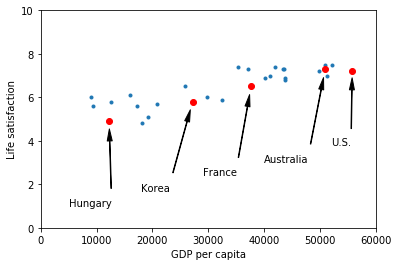

In [14]:
plt.plot(x_sample,y_sample,".")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.xlim(0, xlim)
plt.ylim(0,10)

#variante en utilisant le plot de pandas
#df_sample.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,4))


position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = df_sample.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text, arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

On voit une tendance: la `life satisfaction` semble croitre linéairement en fonction de la `GDP per capita`. On sélectionne donc le modèle linéaire qui contient deux paramètre $w_0$ (=biais=intercept) et $w_1$ (la pente): 
$$
\text{Life_statisfaction} = w_0 + w_1 \text{GDP_per_capita}+ \text{Bruit}
$$

### Ajustement du modèle

In [17]:
from sklearn import linear_model

model_lin_sample = linear_model.LinearRegression(fit_intercept=False)
# variante: linear_model.LinearRegression(fit_intercept=True) # ->True is the default value    

model_lin_sample.fit(X_sample_ext, y_sample)
w0, w1=model_lin_sample.coef_[0],model_lin_sample.coef_[1]
#variante (suite): w0, w1= model_lin_sample.intercept_,lin1.coef_[0]

print("w0:%.2f"%w0,", w1:%.2E"%w1)

w0:4.85 , w1:4.91E-05


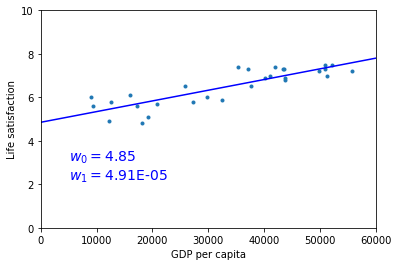

In [18]:
plt.plot(x_sample,y_sample,".")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.xlim(0, xlim)
plt.ylim(0,10)

plt.plot(x_test, w0 + w1*x_test, "b")

plt.text(5000, 3.1, r"$w_0=$"+"%.2f"%w0, fontsize=14, color="b")
plt.text(5000, 2.2, r"$w_1=$"+"%.2E"%w1, fontsize=14, color="b");

Maintenant ce modèle liénaire est le plus proche possible des donnée (au sens des moindres carré). 

### Prédiction

On aimerait savoir si les Chipriotes sont heureux. Mais la réponse ne se trouve pas dans les données de l'OECD.  Par contre on connait le PIB de Chypre: $22\,587\$$


In [19]:
cyprus_gdp = df_gdp.loc["Cyprus"]["GDP per capita"]
print("cyprus gdp per capita:",cyprus_gdp)
cyprus_life_hat = model_lin_sample.predict([[1,cyprus_gdp]])
print("prediction of cyprus life satisfaction:",cyprus_life_hat)

cyprus gdp per capita: 22587.49
prediction of cyprus life satisfaction: [5.96244744]


***A vous:*** Retrouvez $(1\heartsuit)$ la valeur prédite sans utiliser la méthode `.predict()` mais en utilisant direcement `w0` et `w1`.

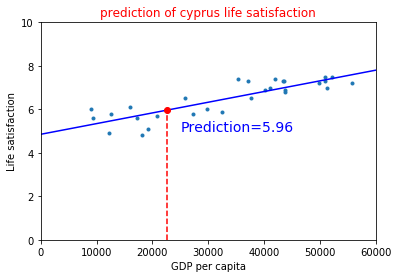

In [20]:
plt.plot(x_sample,y_sample,".")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.xlim(0, xlim)
plt.ylim(0,10)

a=np.linspace(0, xlim, 1000)
plt.plot(a, w0 + w1*a, "b")

plt.title("prediction of cyprus life satisfaction",color="r")
plt.plot([cyprus_gdp, cyprus_gdp], [0, cyprus_life_hat], "r--")
plt.text(25000, 5.0, "Prediction=%.2f"%cyprus_life_hat, fontsize=14, color="b")
plt.plot(cyprus_gdp, cyprus_life_hat, "ro");

***A vous:***  Calculez $(2\heartsuit)$ la prédiction donnerait l'algo des 3 plus proches voisins (instance-based). Il faut simplement répérer les 4 pays les plus proches de Chipre et moyenner leur `life_satisfaction`. Aide: utilisez `sort_values()`. Faites $(+2\diamondsuit)$ en sorte que votre procédure soit automatique (=qu'elle utilise pas la lecture humaine d'un tableau).

### Résumé

En résumé nous avons:

*  observer les données.
* Sélectionner le modèle.
* Entrainer (=ajuster=fiter) le modèle 
* Utiliser le modèle pour faire une prédiction

Ce sont les étapes classique d'un projet de machine-learning

##  Données d'entrainement non représentatives $\hookleftarrow$

Pour qu'un modèle se généralise bien, il faut que les données d'entrainement soient représentatives de l'ensemble des données. Etait-ce le cas? Rappelons que nous avions enlever certains pays:

In [21]:
df_missing

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [54]:
clear_all()
df_full,df_sample,df_missing,df_gdp=load_all_data()

"numpy extraction"
x_sample = df_sample["GDP per capita"].values
X_sample_ext= np.stack([np.ones_like(x_sample),x_sample],axis=1) 
y_sample = df_sample["Life satisfaction"].values

"numpy extraction"
x_full = df_full["GDP per capita"].values
X_full_ext = np.stack([np.ones_like(x_full),x_full],axis=1) 
y_full = df_full["Life satisfaction"].values

"some very simple test data: points regularly spaced on a given interval"
xlim=110000
x_test=np.linspace(0, xlim, 1000)

In [55]:
position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

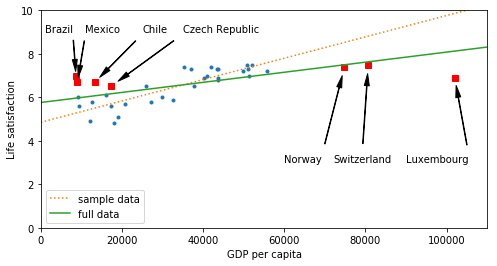

In [56]:
plt.figure(figsize=(8,4))
plt.plot(x_sample,y_sample,".")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.xlim(0, xlim)
plt.ylim(0,10)

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = df_missing.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")
    

def fit_and_plot_lin_model(X,y):    
    model = linear_model.LinearRegression(fit_intercept=False)
    model.fit(X, y)
    w0, w1=model.coef_[0],model.coef_[1]
    return w0,w1
    
    
w0_sample,w1_sample=fit_and_plot_lin_model(X_sample_ext,y_sample)
w0_full,w1_full=fit_and_plot_lin_model(X_full_ext,y_full)

plt.plot(x_test, w0_sample + w1_sample*x_test,":",label="sample data")
plt.plot(x_test, w0_full + w1_full*x_test,label="full data")
plt.legend(loc=3);



***A vous:*** Commentez $(3\diamondsuit)$.

## Sous et sur-ajustement $\hookleftarrow$ 

In [57]:
clear_all()
df_full,df_sample,df_missing,df_gdp=load_all_data()

"numpy extraction"
x = df_full["GDP per capita"].values
X = x[:,np.newaxis] 
y = df_full["Life satisfaction"].values

"some very simple test data: points regularly spaced"
xlim=110000
x_test=np.linspace(0, xlim, 1000)

### Un bon modèle polynomial

X_poly.shape: (36, 5)
[[8.67e+03 7.52e+07 6.52e+11 5.65e+15 4.90e+19]
 [9.01e+03 8.12e+07 7.31e+11 6.59e+15 5.94e+19]
 [9.05e+03 8.20e+07 7.42e+11 6.72e+15 6.09e+19]
 [9.44e+03 8.91e+07 8.41e+11 7.93e+15 7.49e+19]
 [1.22e+04 1.50e+08 1.83e+12 2.24e+16 2.75e+20]
 [1.25e+04 1.56e+08 1.95e+12 2.44e+16 3.05e+20]
 [1.33e+04 1.78e+08 2.37e+12 3.17e+16 4.23e+20]]
X_poly_scaled.shape: (36, 5)
[[-1.25 -0.79 -0.52 -0.38 -0.3 ]
 [-1.24 -0.79 -0.52 -0.38 -0.3 ]
 [-1.23 -0.79 -0.52 -0.38 -0.3 ]
 [-1.22 -0.79 -0.52 -0.38 -0.3 ]
 [-1.09 -0.76 -0.51 -0.37 -0.3 ]
 [-1.07 -0.75 -0.51 -0.37 -0.3 ]
 [-1.03 -0.74 -0.51 -0.37 -0.3 ]]


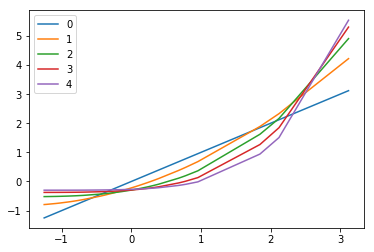

In [58]:
from sklearn import preprocessing
np.set_printoptions(precision=2)

degree=5
poly = preprocessing.PolynomialFeatures(degree=degree, include_bias=False)
X_poly=poly.fit_transform(X)
print("X_poly.shape:",X_poly.shape)
print(X_poly[:7,:7])

scaler = preprocessing.StandardScaler()
X_poly_scaled=scaler.fit_transform(X_poly)
print("X_poly_scaled.shape:",X_poly_scaled.shape)
print(X_poly_scaled[:7,:7])

for i in range(degree):
    plt.plot(X_poly_scaled[:,0],X_poly_scaled[:,i],label=str(i))
plt.legend();

In [59]:
# this time we ask to the model to add the intercept
model_poly = linear_model.LinearRegression() #= .LinearRegression(fit_intercept=True)
model_poly.fit(X_poly_scaled, y)

print("coef_:\n",model_poly.coef_)
print("intercept_:%.2f"%model_poly.intercept_)

coef_:
 [ -14.07   69.31 -137.79  126.66  -43.99]
intercept_:6.58


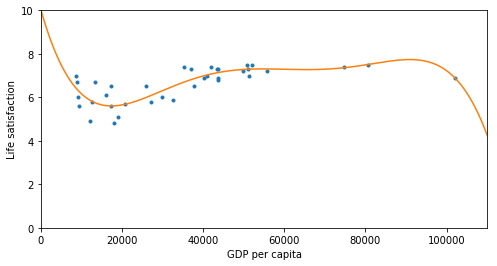

In [60]:
plt.figure(figsize=(8,4))
plt.plot(x,y,".")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.xlim(0, xlim)
plt.ylim(0,10)


X_test_poly=poly.transform(x_test[:,np.newaxis])
X_test_poly_scaled=scaler.transform(X_test_poly)
y_test_hat = model_poly.predict(X_test_poly_scaled)
plt.plot(x_test, y_test_hat);

***A vous:*** Reproduisez $(3\heartsuit)$ cette courbe polynomiale à partir de `.coef_` et `.intercept_`

### Un modèle sur-ajusté

On choisi maintenant de modéliser les donnée avec un polynome de très grand degré. 

Par ailleurs, informatiquement, on emboite les traitements à l'aide d'un `pipeline` de `sklearn`. Plus d'explications viennent plus loin.  

estimated coef:
 [ 2.77e+05 -7.40e+06  1.14e+08 -1.19e+09  8.76e+09 -4.67e+10  1.81e+11 -5.08e+11  1.00e+12 -1.27e+12  7.73e+11  3.12e+11 -7.93e+11  9.39e+10  5.80e+11 -1.96e+11 -3.97e+11  3.14e+11 -2.14e+10 -2.76e+10]
estimated intercept:
 6.583299686418568


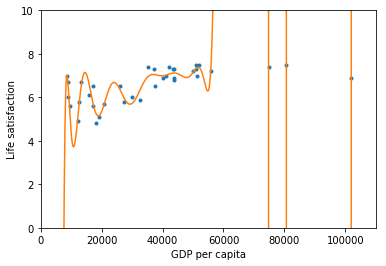

In [61]:
plt.plot(x,y,".")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.xlim(0, xlim)
plt.ylim(0,10)

from sklearn import preprocessing
from sklearn import pipeline

poly = preprocessing.PolynomialFeatures(degree=20, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()
pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler),('lin',lin_reg2)])

# this call fit_transform() of the two first objects: 'poly' and 'scal',
# and   the method .fit() for the third one: 'lin'
pipeline_reg.fit(X, y) 
print("estimated coef:\n",pipeline_reg.named_steps['lin'].coef_)
print("estimated intercept:\n",pipeline_reg.named_steps['lin'].intercept_)

# this call transform() of the two first objects: 'poly' and 'scal',
# and   the method .predict() for the third one: 'lin'
y_test_hat = pipeline_reg.predict(x_test[:,np.newaxis])

plt.plot(x_test,y_test_hat);

## Constraining a model

Overfitting happens when the model is too complex relative to the amount and noisiness of the training data. The possible solutions are:

* To simplify the model by selecting one with fewer parameters (e.g., a linear model rather than a high-degree polynomial model), by reducing the number of attributes in the training data or by constraining the model
* To gather more training data
* To reduce the noise in the training data (e.g., fix data errors and remove outliers).





estimated coef:
 [ 0.43  0.55  0.09 -0.2  -0.28 -0.26 -0.2  -0.14 -0.09 -0.04 -0.01  0.02  0.03  0.05  0.06  0.07  0.07  0.07  0.08  0.08]
estimated intercept:
 6.583333333333333


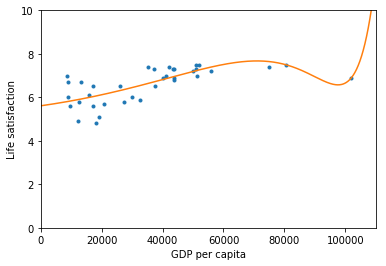

In [38]:
plt.plot(x,y,".")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.xlim(0, xlim)
plt.ylim(0,10)

from sklearn import preprocessing
from sklearn import pipeline


poly = preprocessing.PolynomialFeatures(degree=20, include_bias=False)
scaler = preprocessing.StandardScaler()
ridge = linear_model.Ridge(alpha=0.5)
pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler),('lin',ridge)])

pipeline_reg.fit(X, y) 
print("estimated coef:\n",pipeline_reg.named_steps['lin'].coef_)
print("estimated intercept:\n",pipeline_reg.named_steps['lin'].intercept_)

y_test_hat = pipeline_reg.predict(x_test[:,np.newaxis])

plt.plot(x_test,y_test_hat);

## Le design de Scikit-Learn


L'API de `sklearn` est remarquablement bien conçue.  Voici un extrait du livre d'Aurélien Géron qui explique est principe du desing.


### Consistence. 

All objects share a consistent and simple interface:

* ***Estimators.***  Any object that can estimate some parameters based on a dataset is called an estimator. Ex:

        StandardScaler, PolynomialFeatures, LinearRegression, Ridge 
    
are estimator. The estimation itself is performed by the `fit()` method, and it takes only a dataset as a parameter (or two for supervised learning algorithms; the second dataset contains the labels). Any other parameter needed to guide the estimation process is considered a hyperparameter (such as `degree` or `alpha`), and it must be set as an instance variable (generally via a constructor parameter).

* ***Transformers.***  Some estimators such as

        StandardScaler, PolynomialFeatures

can also transform a dataset; these are called transformers. Once again, the API is quite simple: the transformation is performed by the `transform()` method with the dataset to transform as a parameter. It returns the transformed dataset. This transformation generally relies on the learned parameters, as is the case for an imputer. All transformers also have a convenience method called `fit_transform()` that is « equivalent to calling `fit()` and then `transform()` (but sometimes `fit_transform()` is optimized and runs much faster).


* ***Predictors.***  Finally, some estimators are capable of making predictions given a dataset; they are called predictors. For example

        LinearRegression, Ridge 

are predictor. A predictor has a `predict()` method that takes a dataset of new instances and returns a dataset of corresponding predictions. Some of them have also the method `predict_proba()`  quantifying the fiability of predictions.  It also has a `score()` method that measures the quality of the predictions given a test set (and the corresponding labels in the case of supervised learning algorithms). 


### Inspection. 

All the estimator’s hyperparameters are accessible directly via public instance variables, e.g:

        ridge.alpha, polynomialFeatures.degree

and all the estimator’s learned parameters are also accessible via public instance variables with an underscore suffix, e.g:

       ridge.coef_, ridge.intercept_ 



### Nonproliferation of classes. 

Datasets are represented as NumPy arrays or SciPy sparse matrices, instead of homemade classes. Hyperparameters are just regular Python strings or numbers 


### Sensible defaults. 

Scikit-Learn provides reasonable default values for most parameters, making it easy to create a baseline working system quickly »

### Composition.

Existing building blocks are reused as much as possible.  




## Reproduisons sklearn $\hookleftarrow$

Le fait de recoder un bout de la librairie va nous permettre de mieux comprendre comme elle fonctionne, et éventuellement, on pourra dans le futur remplacer certaine briques par des briques personnalisées. Nous ne prétendons pas faire mieux! 

In [39]:
clear_all()
df_full,df_sample,df_missing,df_gdp=load_all_data()

"numpy extraction"
x = df_full["GDP per capita"].values
X = x[:,np.newaxis] 
y = df_full["Life satisfaction"].values

"some very simple test data: points regularly spaced"
xlim=110000
x_test=np.linspace(0, xlim, 1000)

### Deux transformers

Reproduisons le `PolynomialFeatures` de `sklearn`. Remarquons que la méthode `fit()` ne fait rien. 

Puis reproduisons le `StandardScaler`. Cette fois-ci `fit()` calcule bien quelque chose sur les données. 


In [40]:
class MyPolynomialFeatures:

    def __init__(self,degree): #Todo: add the arg 'include_bias' (with False as default)
        self.degree=degree
    
    
    def transform(self,X):
        assert len(X.shape)==2, "X must be a matrix"
        assert X.shape[1]==1, "X must be a column matrix" 
        #Todo: generalize when X has several columns
        
        res=[]
        for i in range(1,self.degree+1):
            res.append(X[:,0]**i)
        
        res_np=np.stack(res,axis=1)
        return res_np
        
    def fit(self,X):
        pass
    
    def fit_transform(self,X):
        return self.transform(X)
    

***A vous:*** Effectuez $(2\heartsuit+3\heartsuit)$ les deux `todo` dans le code de `MyPolynomialFeatures`. Testez-les. 

In [41]:
a=np.arange(0,11,1)
A=a[:,np.newaxis]
A_ext=MyPolynomialFeatures(3).fit_transform(A)
print(A_ext)

[[   0    0    0]
 [   1    1    1]
 [   2    4    8]
 [   3    9   27]
 [   4   16   64]
 [   5   25  125]
 [   6   36  216]
 [   7   49  343]
 [   8   64  512]
 [   9   81  729]
 [  10  100 1000]]


In [42]:
class MyStandardScaler:
    
    def __init__(self): 
        pass
                
    def fit(self,X):
        self.mean_=np.mean(X,axis=0)
        self.std_=np.std(X,axis=0)
                
    
    def transform(self,X):
        assert len(X.shape)==2, "X must be a matrix"
        
        "res[i,j]=(X[i,j] - mean[j])/std[j]"
                
        res=(X-self.mean_[np.newaxis,:])/self.std_[np.newaxis,:]
        return res

    
    def fit_transform(self,X):
        self.fit(X)
        return self.transform(X)
        

In [43]:
A=np.arange(10*4,dtype=np.float64).reshape([10,4])
print("A:\n",A)
A_sc1=preprocessing.StandardScaler().fit_transform(A)
print("A_sc1:\n",A_sc1)
A_sc2=MyStandardScaler().fit_transform(A)
print("A_sc2:\n",A_sc2)

A:
 [[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [12. 13. 14. 15.]
 [16. 17. 18. 19.]
 [20. 21. 22. 23.]
 [24. 25. 26. 27.]
 [28. 29. 30. 31.]
 [32. 33. 34. 35.]
 [36. 37. 38. 39.]]
A_sc1:
 [[-1.57 -1.57 -1.57 -1.57]
 [-1.22 -1.22 -1.22 -1.22]
 [-0.87 -0.87 -0.87 -0.87]
 [-0.52 -0.52 -0.52 -0.52]
 [-0.17 -0.17 -0.17 -0.17]
 [ 0.17  0.17  0.17  0.17]
 [ 0.52  0.52  0.52  0.52]
 [ 0.87  0.87  0.87  0.87]
 [ 1.22  1.22  1.22  1.22]
 [ 1.57  1.57  1.57  1.57]]
A_sc2:
 [[-1.57 -1.57 -1.57 -1.57]
 [-1.22 -1.22 -1.22 -1.22]
 [-0.87 -0.87 -0.87 -0.87]
 [-0.52 -0.52 -0.52 -0.52]
 [-0.17 -0.17 -0.17 -0.17]
 [ 0.17  0.17  0.17  0.17]
 [ 0.52  0.52  0.52  0.52]
 [ 0.87  0.87  0.87  0.87]
 [ 1.22  1.22  1.22  1.22]
 [ 1.57  1.57  1.57  1.57]]


### Un modèle

In [44]:
class MyLinearModel:
    
    def fit(self, X, Y):
        """ X.T X^(-1) """
        XTX_1 = np.linalg.pinv(X.T @ X) #pinv=pseudo-inverse (au cas où X n'est pas inversible)
        """l'estimateur des poids w"""
        self.hat_w = XTX_1 @ X.T @ Y

    def predict(self,X):
        return X @ self.hat_w
    

***A vous:*** Les méthodes `fit()` et `predict()` fonctionne-t-elle avec des `X` vecteur ou matrice $(1\heartsuit)$?

***A vous:*** Créez $(2\heartsuit)$ un programme test pour cette classe: utilisez des donnée très simple que vous produisez localement. 

***A vous:*** Ajoutez $(3\heartsuit)$ la méthode `.score(X,y)`. Allez voir l'[aide de sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) pour savoir ce qu'elle doit renvoyer. 

***A vous:*** Créez $(4\heartsuit)$ la classe `MyRidgeModel`. Testez-là.  

### Un pipeline

L'objet 

        pipeline = pipeline.Pipeline([('obj_1', obj_1), ('obj_2', obj_2),...,('obj_n',obj_n)])

On crée un objet dont le but est d'enchainé les traitements effectués par `obj_1`,...,`obj_n`. 

* Quand on effectue `pipeline.fit_transform(X)`, c'est comme si on faisait
```
X1=ob_1.fit_transform(X)
X2=obj_2.fit_transform(X1)
...
Xn=obj_n.fit_transform(Xn-1)
```
et cela renvoie `Xn`

* Quand on effectue `pipeline.transform(X)`, c'est comme si on faisait
```
X1=ob_1.transform(X)
X2=obj_2.transform(X1)
...
Xn=obj_n.transform(Xn-1)
```
et cela renvoie `Xn`


* Quand on effectue `pipeline.fit(X)`, c'est comme si on faisait.
```
X1=ob_1.fit_transform(X)
X2=obj_2.fit_transform(X1)
...
obj_n.fit(Xn-1)
```
et cela ne renvoie rien. 

* Quand on effectue `pipeline.predict(X,y)`, c'est comme si on faisait
```
X1=ob_1.transform(X)
X2=obj_2.transform(X1)
...
y_hat=obj_n.predict(Xn-1,y)
```
et cela renvoie `y_hat`



En fait avec un peu de bouteille, c'est très naturelle (cf la suite).  Remarquons aussi que les `obj_1`,..., `obj_n` ne sont pas forcément des objets de `sklearn`. Vous pouvez aussi mettre vos propres objets tant qu'ils ont les méthodes nécessaires. Par exemple, si votre but est d'appeller `pipeline.fit()` et `pipeline.predict()`, les objets `obj_1`,..., `obj_n-1` doivent avoir les méthode `fit_transform` et `transform`, mais l'objet `obj_n` doit avoir les méthodes `fit` et `predict`. 


***A vous:*** Ce que l'on vient de dire montre que `sklearn` utilise le `ducktyping`. Mais qu'est-ce donc $(2\heartsuit)$?






In [47]:
class MyPipeline:
    
    def __init__(self,degree):        
        
        self.degree=degree
        self.poly = preprocessing.PolynomialFeatures(degree=self.degree, include_bias=False)
        self.scaler=preprocessing.StandardScaler()
        self.model_poly = linear_model.LinearRegression(fit_intercept=True)
        
    def fit(self,x,y):
        X_poly_scaled=self._data_augmentation(x)
        self.model_poly.fit(X_poly_scaled, y)
        self.coef_=self.model_poly.coef_
        self.intercept_=self.model_poly.intercept_
        
    def predict(self,x_test):
        X_poly_scaled=self._data_augmentation(x_test)
        y_hat=self.model_poly.predict(X_poly_scaled)
        return y_hat
        
    def _data_augmentation(self,X):    
        X_poly=self.poly.fit_transform(X)      
        X_poly_scaled=self.scaler.fit_transform(X_poly)
       
            
        return X_poly_scaled

estimated coef:
 [ 7.65e+04 -1.52e+06  1.35e+07 -1.61e+07 -9.77e+08  1.20e+10 -7.70e+10  3.11e+11 -8.08e+11  1.26e+12 -8.13e+11 -5.93e+11  1.01e+12  4.99e+11 -8.63e+11 -8.33e+11  3.51e+11  1.04e+12  5.52e+11 -4.65e+11 -1.02e+12 -6.94e+11  1.72e+11  8.89e+11  9.69e+11  3.60e+11 -5.59e+11 -1.14e+12 -7.29e+11  1.17e+12]
estimated intercept:
 6.582971234657295


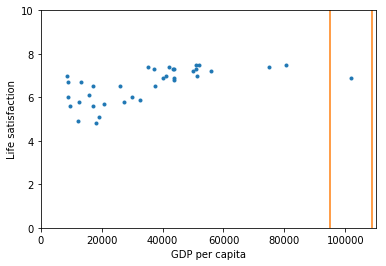

In [48]:
plt.plot(x,y,".")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.xlim(0, xlim)
plt.ylim(0,10)

from sklearn import preprocessing
from sklearn import pipeline


pipeline_reg = MyPipeline(degree=30)

pipeline_reg.fit(X, y) 
print("estimated coef:\n",pipeline_reg.coef_)
print("estimated intercept:\n",pipeline_reg.intercept_)

y_test_hat = pipeline_reg.predict(x_test[:,np.newaxis])

plt.plot(x_test,y_test_hat);

Cela ne fonctionne pas!  l'erreur se trouve dans `MyPipeline`. C'est une erreur que l'on recontre fréquemment dans les programmes qu'on croise sur internet.  Le pire est que cette erreur  ne se détecte pas à tous les coups: essayez avec `degree=3`, cela fonctionne quand même! 

***A vous:*** Corrigez $(3\heartsuit)$ cette erreur!  Aide: il faut distinguer deux cas dans la méthode `_data_augmentation`.  Sauriez-vous expliquer $(3\diamondsuit)$ en  phrases et/ou en équations les raisons de cette erreur?

## Jeux de données 'oxydo' $\hookleftarrow$

Observons maintenant des données venant d'une expérience chimique. Les données sont séparée en `train` et `test`

In [49]:
clear_all()

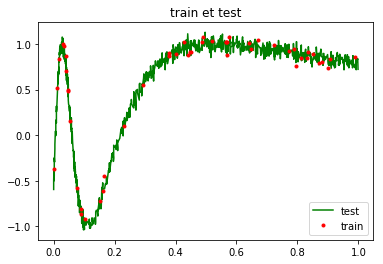

In [50]:
"""  observons les données"""

z = np.loadtxt("data/oxydo_train.csv", delimiter=",")
x_train, y_train = z[:, 0], z[:, 1]

z_test = np.loadtxt("data/oxydo_test.csv", delimiter=",")
x_test,y_test = z_test[:, 0],z_test[:, 1]

plt.plot(x_test, y_test, label="test", c="green")
plt.plot(x_train, y_train, ".", label="train", c="red")

plt.title("train et test")

plt.legend(loc=4);


In [137]:
""" fonction pour augmenter les données """
def expand_x(x,freqMax):
    """ une ligne de 1 et une ligne contenant x """
    x_exp = [np.ones_like(x),x]
    """ on rajoute les sin/cos de x """
    for i in range(1, freqMax + 1):
        x_exp.append(np.sin(2. * np.pi * i * x))
        x_exp.append(np.cos(2. * np.pi * i * x))

    """ on transpose pour avoir les descripteurs en colonnes"""
    return np.array(x_exp).T

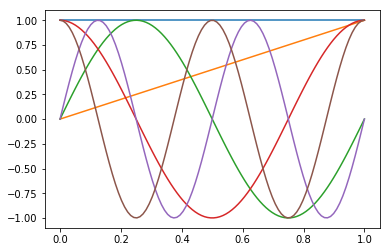

In [140]:
a=np.linspace(0,1,100)
A_ext=expand_x(a,2)
plt.plot(a,A_ext);

***A vous:*** Quelle $(1\heartsuit)$ théorie nous indique qu'un modèle avec des extentions sin-cos permet de reconstituer toutes les fonction? Que $(2\heartsuit)$ se passerait-il si on n'ajouter que les cosinus?

***Exo:*** $(15\diamondsuit)$  Dans cette exo, vous avez entièrement le choix de la manière de coder: utiliser uniquement vos objets, ou bien les objets de `sklearn` ou bien un mixe des deux. On essaiera de présenter les résultats de manière compacte (superposez les courbes plutot que de les mettre les unes en desous des autres), et sympathique (comparez les erreurs avec des courbes plutôt qu'avec des tableaux de chiffres). 

* Entrainez plusieurs modèles sin-cos sur les données train. Affichez la mse (Mean square error) en fonction du paramètre `freqMax`. Pour montrer l'efficacité du modèle, sur quel jeu de donnée doit être calculer cette mse?

* Comparez les mse des modèles sin-cos et polynomiaux. Interpréter les résultats. 

## La balance Biais-variance

In [32]:
def extractTrainDataRandomly(trainSize,z):
    shuffleIndex = np.random.permutation(z.shape[0])
    selectedIndices=shuffleIndex[:trainSize]
    x_train = z[selectedIndices, 0]
    y_train = z[selectedIndices, 1]
    return x_train,y_train

def predictionFunction_sinCos(x_train,y_train,x_test,freqMax):
    x_train_exp=expand_x(x_train,freqMax)
    model = LinearModel()
    model.fit(x_train_exp, y_train)
    x_test_exp=expand_x(x_test,freqMax)
    return model.predict(x_test_exp)

In [33]:
trainSize = 50
nbEssaies=200

z_test = np.loadtxt("data/oxydo_test.csv", delimiter=",")
x_test = z_test[:, 0]
y_test = z_test[:, 1]
test_size=len(x_test)

tunings=[1,2,3,4,5,6]
tuning_to_variances=[]
tuning_to_bias=[]
tuning_to_loss=[]

z_train = np.loadtxt("data/oxydo_big_train.csv", delimiter=",")

for tuning in tunings:
    print("tuning:",tuning)
    estimations= np.zeros([nbEssaies,test_size])
    for essaie in range(nbEssaies):
        x_train, y_train = extractTrainDataRandomly(trainSize,z_train)
        
        y_test_hat = predictionFunction_sinCos(x_train, y_train, x_test, tuning)  
        estimations[essaie,:]=y_test_hat
        
    """le premier np.mean c'est la moyenne sur les données test.
    la seconde opération s'effectue sur les différents essaies."""
    tuning_to_variances.append(np.mean(  np.std (estimations,axis=0)))
    tuning_to_bias.append     (np.mean( (np.mean(estimations,axis=0)-y_test)**2))
    tuning_to_loss.append     (np.mean( (estimations-y_test)**2   ))
    
plt.plot(tunings,tuning_to_variances,label="variance")
plt.plot(tunings,tuning_to_bias,label="biais")
plt.plot(tunings,tuning_to_loss,label="loss")

plt.legend(loc=2);


tuning: 1


NameError: name 'expand_x' is not defined

QUIZ:  plus le paramètre 'tuning' est grand et plus la flexibilité du modèle est grande/petite ?
D'après l'étude que l'on vient de faire, quel serait le meilleurs tuning ?

si votre patron veut favoriser la 'reproductibilité' (ou robustesse) de vos expériences, quel tuning choisir ?
si votre patron préfère avoir le meilleurs ajustement possible,  quel tuning choisir ?